<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Manipulation, EDA, and Reporting Results

_Authors: Joseph Nelson (DC), Sam Stack (DC)_

---

> **This lab is intentionally open-ended, and you're encouraged to answer your own questions about the dataset!**


### What makes a song a hit?

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. 

Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

**Provide (at least) a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?**

---

### Minimum Requirements

**At a minimum, you must:**

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

**You should strive to:**

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualizations

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Billboard data CSV:
billboard_csv = r'C:\Users\Daniel_Heffley\Desktop\jan 5 2020\DAT-course-materials-students-master\homework\billboard.csv'

# We need to use encoding='latin-1' to deal with non-ASCII characters.
df = pd.read_csv(billboard_csv, encoding='latin-1')

In [36]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,1,2,3,...,67,68,69,70,71,72,73,74,75,76
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,9/23/2000,11/18/2000,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2/12/2000,4/8/2000,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,10/23/1999,1/29/2000,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,8/12/2000,9/16/2000,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,8/5/2000,10/14/2000,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#the week name columns were changed before loading in using find and replace in Excel. They are now just numbers

In [38]:
df['66'].unique()# I see now that starting at week 66 and continuing until the end, all of the values are nan, so they can all be deleted

array([nan])

In [39]:
df.shape

(317, 83)

In [40]:
droplist = []
for i in df.columns:
    try:
        
        if int(i) >=66:
            droplist.append(int(i))
    except:
        pass
        

In [43]:
droplist

[66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]

In [44]:
droplist_str = []
for i in droplist:
    droplist_str.append(str(i))

In [45]:
droplist_str

['66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76']

In [46]:
df.drop(droplist_str,axis=1,inplace=True)

In [49]:
#Now all completely Nan columns are gone

In [57]:
df['1'].value_counts(dropna = False)

77     16
99     14
98     14
81     14
75     12
79     12
80     11
85     11
97     10
74     10
86     10
82      9
71      9
94      9
76      9
78      8
84      8
87      8
89      8
95      8
83      7
96      7
91      6
92      6
63      6
73      6
72      5
70      5
100     5
68      4
       ..
93      3
88      2
59      2
57      2
58      2
50      2
64      2
65      2
61      1
43      1
22      1
25      1
28      1
36      1
38      1
39      1
40      1
41      1
42      1
46      1
60      1
48      1
49      1
66      1
51      1
52      1
54      1
56      1
62      1
15      1
Name: 1, Length: 63, dtype: int64

In [56]:
df['30'].value_counts(dropna = False)

NaN      297
 33.0      2
 23.0      2
 45.0      2
 41.0      2
 34.0      1
 37.0      1
 7.0       1
 3.0       1
 44.0      1
 24.0      1
 35.0      1
 19.0      1
 30.0      1
 4.0       1
 5.0       1
 2.0       1
Name: 30, dtype: int64

In [58]:
df['60'].value_counts(dropna = False)

NaN      315
 39.0      1
 37.0      1
Name: 60, dtype: int64

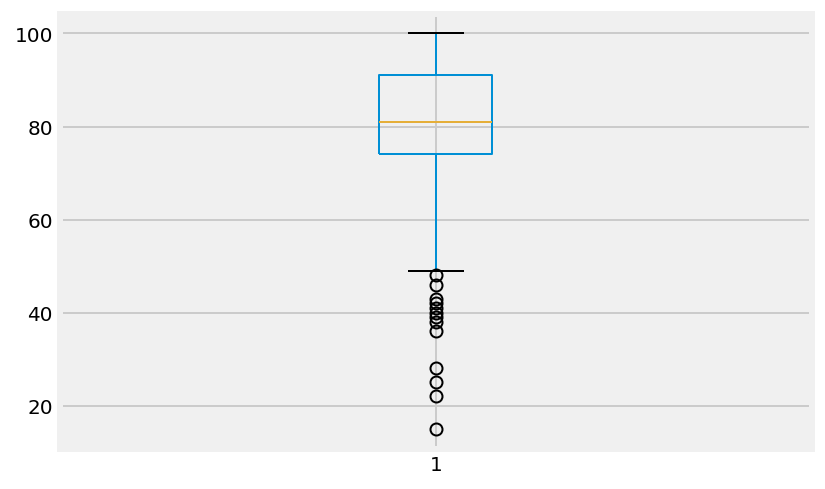

In [60]:
df['1'].plot(kind = 'box')# the first charting week position has no Nan's, so it's best to graph this one

In [61]:
df['1'].describe() # data set seems skewed towards lower positions; why no high ranking songs?

count    317.000000
mean      79.958991
std       14.686865
min       15.000000
25%       74.000000
50%       81.000000
75%       91.000000
max      100.000000
Name: 1, dtype: float64

In [63]:
df.groupby('genre').mean()

,year,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
genre,,,,,,,,,,,,,,,,,,,,,
Country,2000.0,82.405405,75.256757,71.808219,68.309859,65.271429,62.357143,57.692308,54.859375,52.983871,...,25.0,26.0,31.0,32.0,37.0,42.0,42.0,45.0,50.0,NaN
Electronica,2000.0,84.500000,71.000000,64.000000,61.000000,57.000000,54.000000,54.500000,52.250000,51.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gospel,2000.0,76.000000,76.000000,74.000000,69.000000,68.000000,67.000000,61.000000,58.000000,57.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jazz,2000.0,89.000000,89.000000,7.000000,8.000000,66.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latin,2000.0,73.222222,64.333333,58.777778,52.666667,52.000000,42.625000,38.500000,39.000000,39.625000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pop,2000.0,79.222222,68.000000,65.500000,60.333333,52.125000,40.285714,36.142857,33.857143,36.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R&B,2000.0,84.086957,74.095238,67.190476,60.894737,61.473684,56.000000,58.294118,63.294118,62.062500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rap,2000.0,85.172414,76.228070,68.781818,63.925926,60.384615,55.714286,53.723404,50.255814,51.976744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reggae,2000.0,72.000000,72.000000,63.000000,56.000000,62.000000,63.000000,54.000000,60.000000,69.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df['genre'].value_counts()#We can see here that rock and country seem to be most popular in this data set

Rock           137
Country         74
Rap             58
R&B             23
Latin            9
Pop              9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

In [66]:
df['time_cut'] = df['time'].apply(lambda x: str(x)[0])#make new column with rounded down song durations to the minute

In [69]:
df['longer than 4 minutes?'] = df['time_cut'].apply(lambda x: True if int(x) >= 4 else False)#make boolean column

In [70]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,1,2,3,...,58,59,60,61,62,63,64,65,time_cut,longer than 4 minutes?
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,9/23/2000,11/18/2000,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,False
1,2000,Santana,"Maria, Maria",4:18,Rock,2/12/2000,4/8/2000,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,True
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,10/23/1999,1/29/2000,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,True
3,2000,Madonna,Music,3:45,Rock,8/12/2000,9/16/2000,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,False
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,8/5/2000,10/14/2000,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,False


In [73]:
df[df['longer than 4 minutes?'] == True].groupby('genre').mean()#longer songs don't appear to do any better than shorter songs

,year,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,longer than 4 minutes?
genre,,,,,,,,,,,,,,,,,,,,,
Country,2000.0,79.304348,71.521739,67.347826,63.636364,63.136364,61.227273,57.523810,53.450000,50.684211,...,26.0,31.0,32.0,37.0,42.0,42.0,45.0,50.0,NaN,True
Electronica,2000.0,86.500000,79.500000,73.500000,67.500000,61.000000,56.500000,58.500000,55.500000,54.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
Gospel,2000.0,76.000000,76.000000,74.000000,69.000000,68.000000,67.000000,61.000000,58.000000,57.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
Jazz,2000.0,89.000000,89.000000,7.000000,8.000000,66.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
Latin,2000.0,70.750000,64.500000,59.250000,55.000000,57.000000,36.333333,33.333333,32.000000,37.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
Pop,2000.0,80.500000,63.000000,54.000000,72.500000,45.000000,42.000000,31.000000,28.000000,24.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
R&B,2000.0,83.200000,74.300000,66.600000,60.888889,64.111111,55.428571,58.142857,61.000000,59.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
Rap,2000.0,88.000000,81.033333,74.586207,68.071429,65.178571,58.423077,57.000000,51.478261,54.652174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
Reggae,2000.0,72.000000,72.000000,63.000000,56.000000,62.000000,63.000000,54.000000,60.000000,69.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
#The top hits are mostly rock and country in this data set. Their top positions don't seem to make much sense as in
#data set the songs are skewed towards lower charting positions instead of higher charting positions. 